#  赋值

### python的变量及其存储

在高级语言中，变量是对内存及其地址的抽象。对于python而言，python的一切变量都是对象，变量的存储，采用了引用语义的方式，存储的只是一个变量的值所在的内存地址，而不是这个变量的只本身。

引用语义：在python中，变量保存的是对象(值)的引用，我们称为引用语义。采用这种方式，变量所需的存储空间大小一致，因为变量只是保存了一个引用。也被称为对象语义和指针语义。

值语义：有些语言采用的不是这种方式，它们把变量的值直接保存在变量的存储区里，这种方式被我们称为值语义，例如C语言，采用这种存储方式，每一个变量在内存中所占的空间就要根据变量实际的大小而定，无法固定下来。

值语义和引用语义的区别：

值语义：   死的、 傻的、 简单的、 具体的、 可复制的

引用语义： 活的、 聪明的、 复杂的、 抽象的、 不可复制的

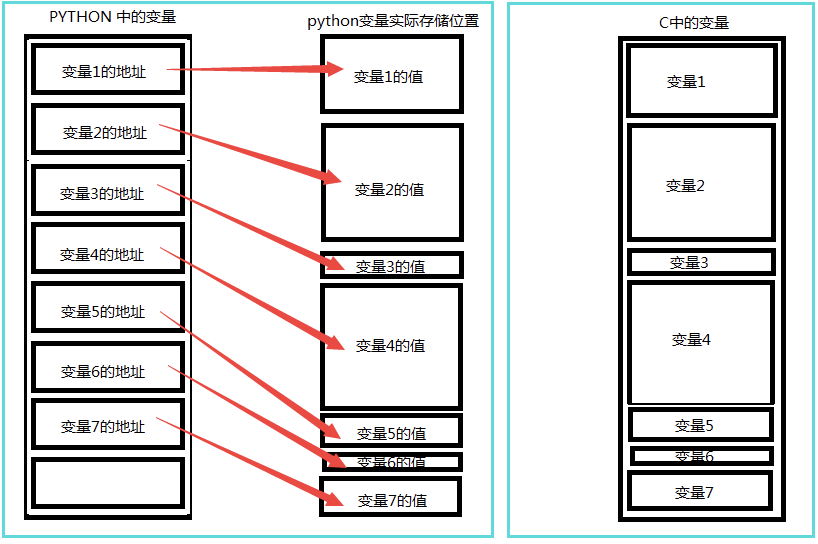

### 各基本数据类型的地址存储及改变情况

在python中的数据类型包括：bool、int、long、float、str、set、list、tuple、dict等等。我们可以大致将这些数据类型归类为简单数据类型和复杂的数据结构。

划分标准是，如果一个数据类型，可以将其他的数据类型作为自己的元素，我就认为这是一种数据结构。数据结构的分类有很多种，但是在Python中常用的只有集合、序列和映射三种结构。对应python中的set、list(tuple、str)、dict；常用的数据类型有int、long、float、bool、str等类型。
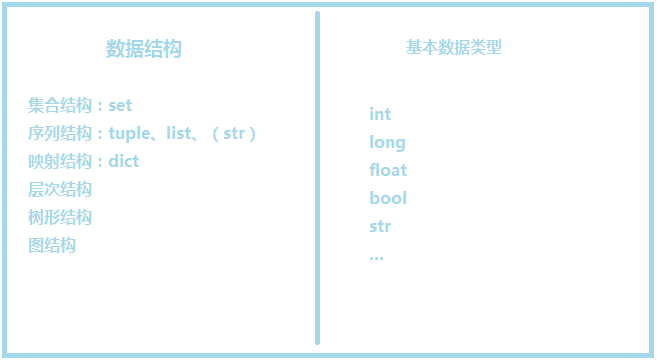

由于python中的变量都是采用的引用语义，数据结构可以包含基础数据类型，导致了在python中数据的存储是下图这种情况，每个变量中都存储了这个变量的地址，而不是值本身；对于复杂的数据结构来说，里面的存储的也只只是每个元素的地址而已。：

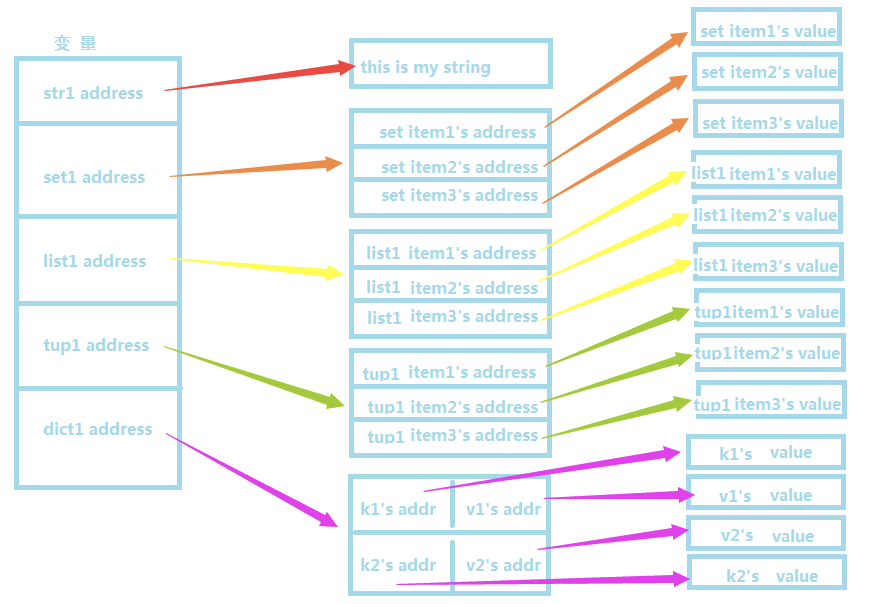

##### 1.数据类型重新初始化对python语义引用的影响

变量的每一次初始化，都开辟了一个新的空间，将新内容的地址赋值给变量。对于下图来说，我们重复的给str1赋值，其实在内存中的变化如下右图：

In [12]:
str1 = 'hello world'
print(id(str1))
str1 = 'new hello world'
print(id(str1))

4459709552
4459711664


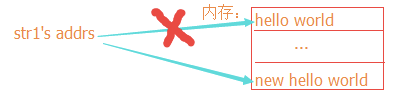

从上图我们可以看出，str1在重复的初始化过程中，是因为str1中存储的元素地址由'hello world'的地址变成了'new hello world'的。

###### 2.数据结构内部元素变化重对python语义引用的影响

对于复杂的数据类型来说，改变其内部的值对于变量的影响：

In [21]:
lst1 = [1,2,3]
print(id(lst1))
lst1.append(4)
print(id(lst1))
lst1.append('new item')
print(id(lst1))
lst1.pop()
print(id(lst1))
lst1[0] = 'hello world'
print(id(lst1))

lst1 = [1,2,3, 4]
print(id(lst1))

4459845000
4459845000
4459845000
4459845000
4459845000
4460736072


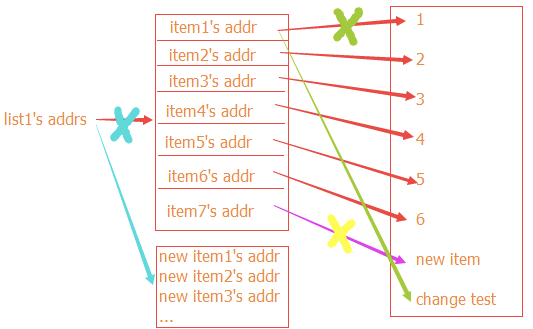

当对列表中的元素进行一些增删改的操作的时候，是不会影响到lst1列表本身对于整个列表地址的，只会改变其内部元素的地址引用。可是当我们对于一个列表重新初始化(赋值)的时候，就给lst1这个变量重新赋予了一个地址，覆盖了原本列表的地址，这个时候，lst1列表的内存id就发生了改变。上面这个道理用在所有复杂的数据类型中都是一样的。

### 变量的赋值

###### 1.str的赋值



In [25]:
str1 = 'hello world'
print(id(str1))
str2 = str1
print(id(str2))

str1 = 'new hello world'
print(str1, str2)
print(id(str1), id(str2))

4460287408
4460287408
new hello world hello world
4460733168 4460287408


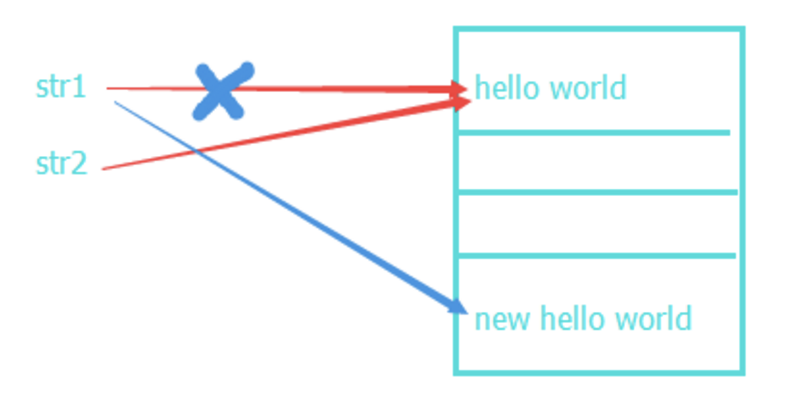

我们刚刚已经知道，str1的再次初始化（赋值）会导致内存地址的改变，从上图的结果我们可以看出修改了str1之后，被赋值的str2从内存地址到值都没有受到影响。

看内存中的变化，起始的赋值操作让str1和str2变量都存储了‘hello world’所在的地址，重新对str1初始化，使str1中存储的地址发生了改变，指向了新建的值，此时str2变量存储的内存地址并未改变，所以不受影响。



###### 2.复杂的数据结构中的赋值

In [27]:
lst1 = [1,2,3]
print(id(lst1))

lst2 = lst1
print(id(lst2))

lst1.append('new item')

print(lst1)
print(lst2)

print(id(lst1))
print(id(lst2))


4459841864
4459841864
[1, 2, 3, 'new item']
[1, 2, 3, 'new item']
4459841864
4459841864


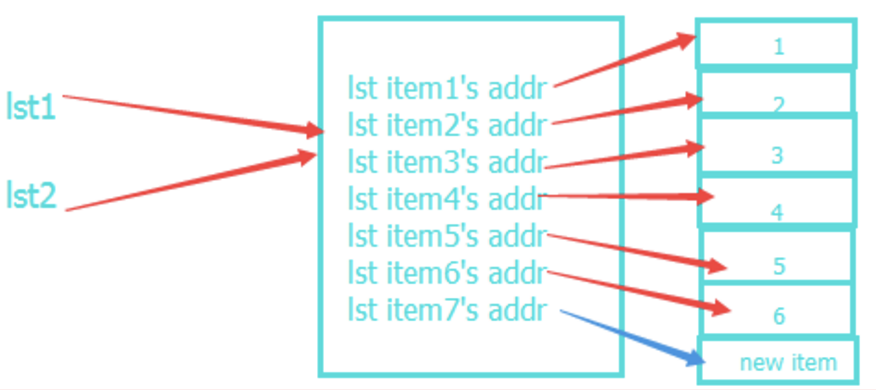

上图对列表的增加修改操作，没有改变列表的内存地址，lst1和lst2都发生了变化。

对照内存图我们不难看出，在列表中添加新值时，列表中又多存储了一个新元素的地址，而列表本身的地址没有变化，所以lst1和lst2的id均没有改变并且都被添加了一个新的元素。

简单的比喻一下，我们出去吃饭，lst1和lst2就像是同桌吃饭的两个人，两个人公用一张桌子，只要桌子不变，桌子上的菜发生了变化两个人是共同感受的。

# 拷贝

对于复杂的数据结构来说，赋值就等于完全共享了资源，一个值的改变会完全被另一个值共享。

然而有的时候，我们偏偏需要将一份数据的原始内容保留一份，再去处理数据，这个时候使用赋值就不够明智了。python为这种需求提供了copy模块。提供了两种主要的copy方法，一种是普通的copy，另一种是deepcopy。我们称前者是浅拷贝，后者为深拷贝。

深浅拷贝一直是所有编程语言的重要知识点，下面我们就从内存的角度来分析一下两者的区别。

### Copy 浅拷贝

浅拷贝：不管多么复杂的数据结构，浅拷贝都只会copy一层。下面就让我们看一张图，来了解一下浅浅拷贝的概念。

屏幕快照 2018-08-04 下午5.18.53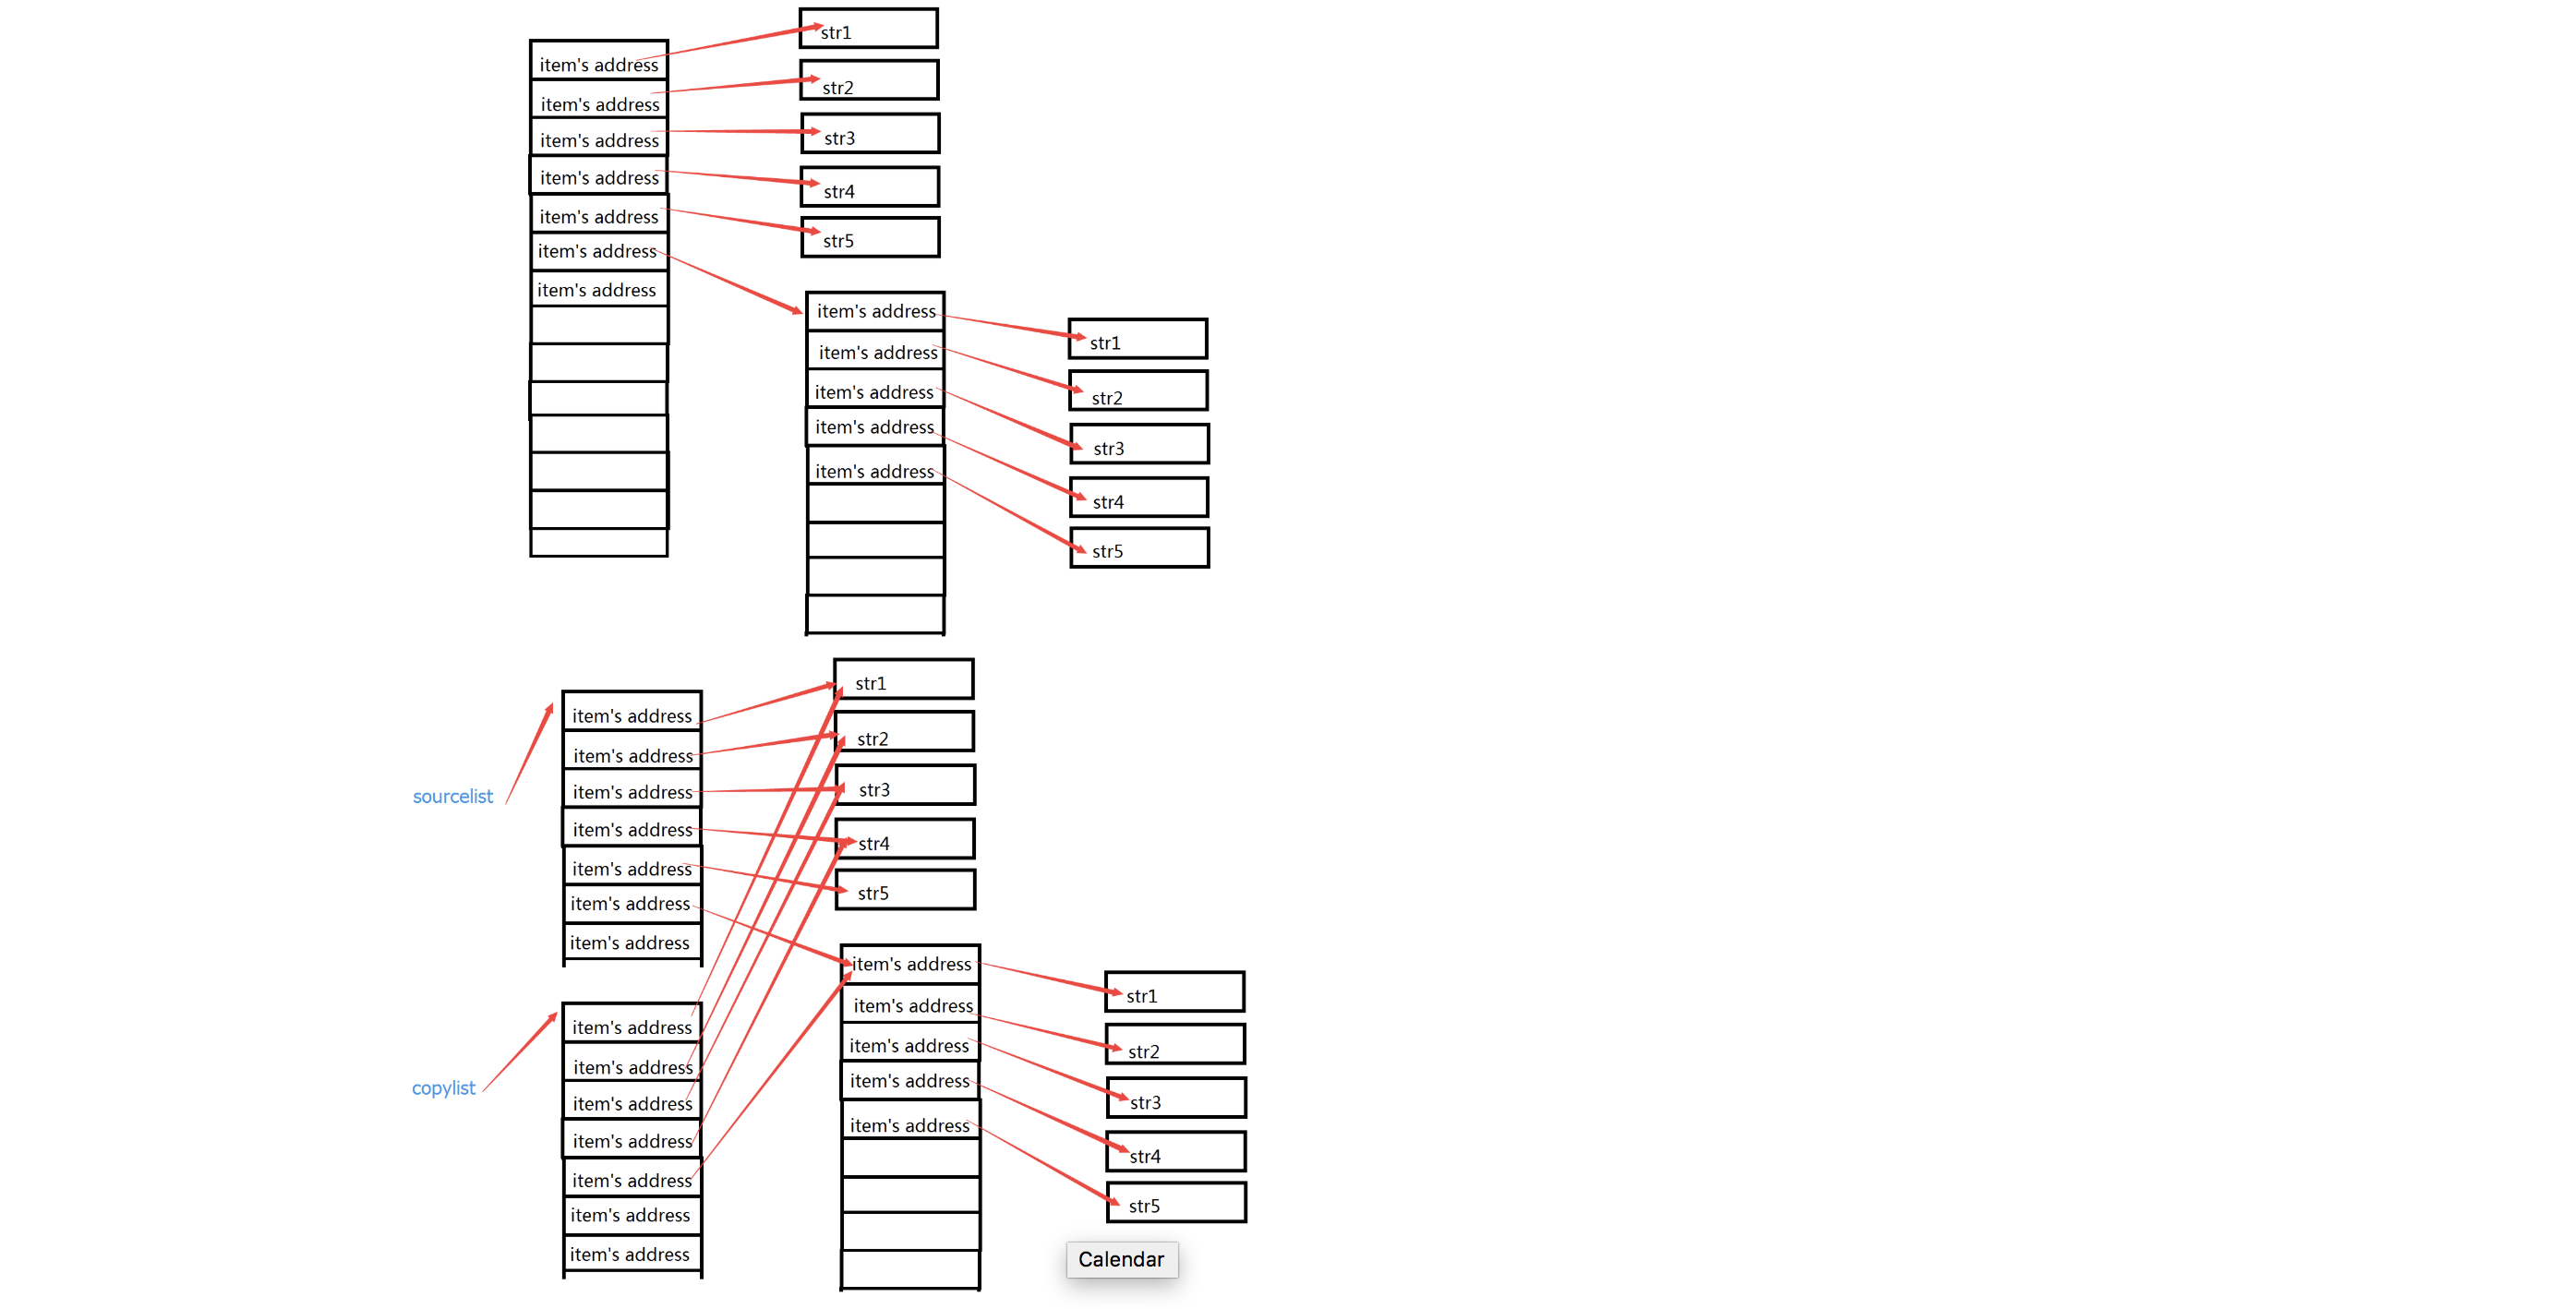

 看上面两张图，我们加入左图表示的是一个列表sourcelist，sourcelist = ['str1','str2','str3','str4','str5',['str1','str2','str3','str4','str5']]；

右图在原有的基础上多出了一个浅拷贝的copylist，copylist = ['str1','str2','str3','str4','str5',['str1','str2','str3','str4','str5']]；

sourcelist和copylist表面上看起来一模一样，但是实际上在内存中已经生成了一个新列表，copy了sourceLst，获得了一个新列表，存储了5个字符串和一个列表所在内存的地址。



我们看下面分别对两个列表进行的操作，红色的框框里面是变量初始化，初始化了上面的两个列表；我们可以分别对这两个列表进行操作，例如插入一个值，我们会发现什么呢？如下所示

屏幕快照 2018-08-04 下午5.18.28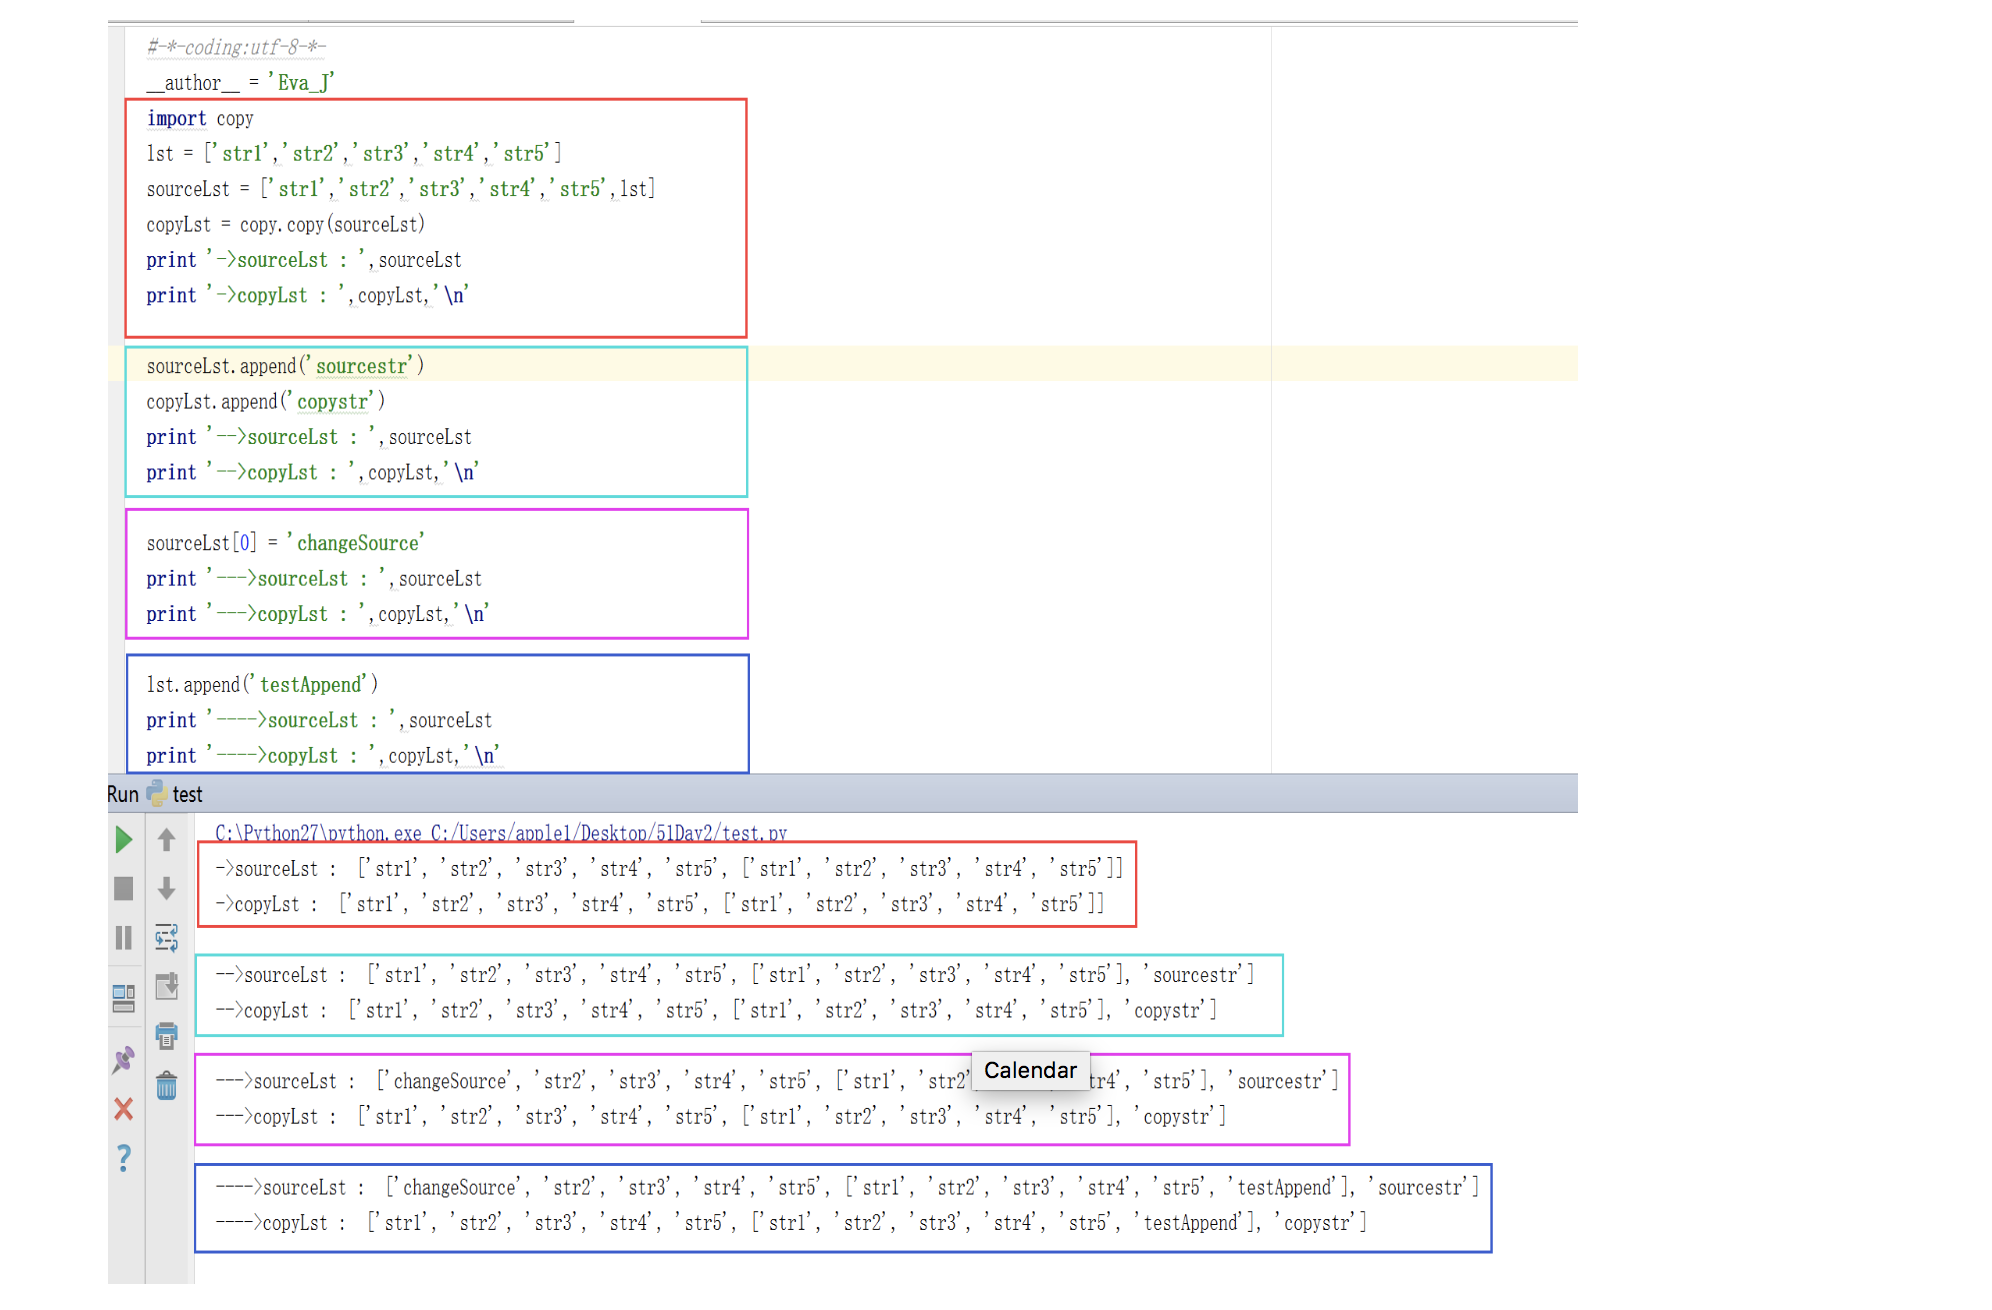

从上面的代码我们可以看出，对于sourceLst和copyLst列表添加一个元素，这两个列表好像是独立的一样都分别发生了变化，但是当我修改lst的时候，这两个列表都发生了变化，这是为什么呢？我们就来看一张内存中的变化图：

屏幕快照 2018-08-04 下午5.19.49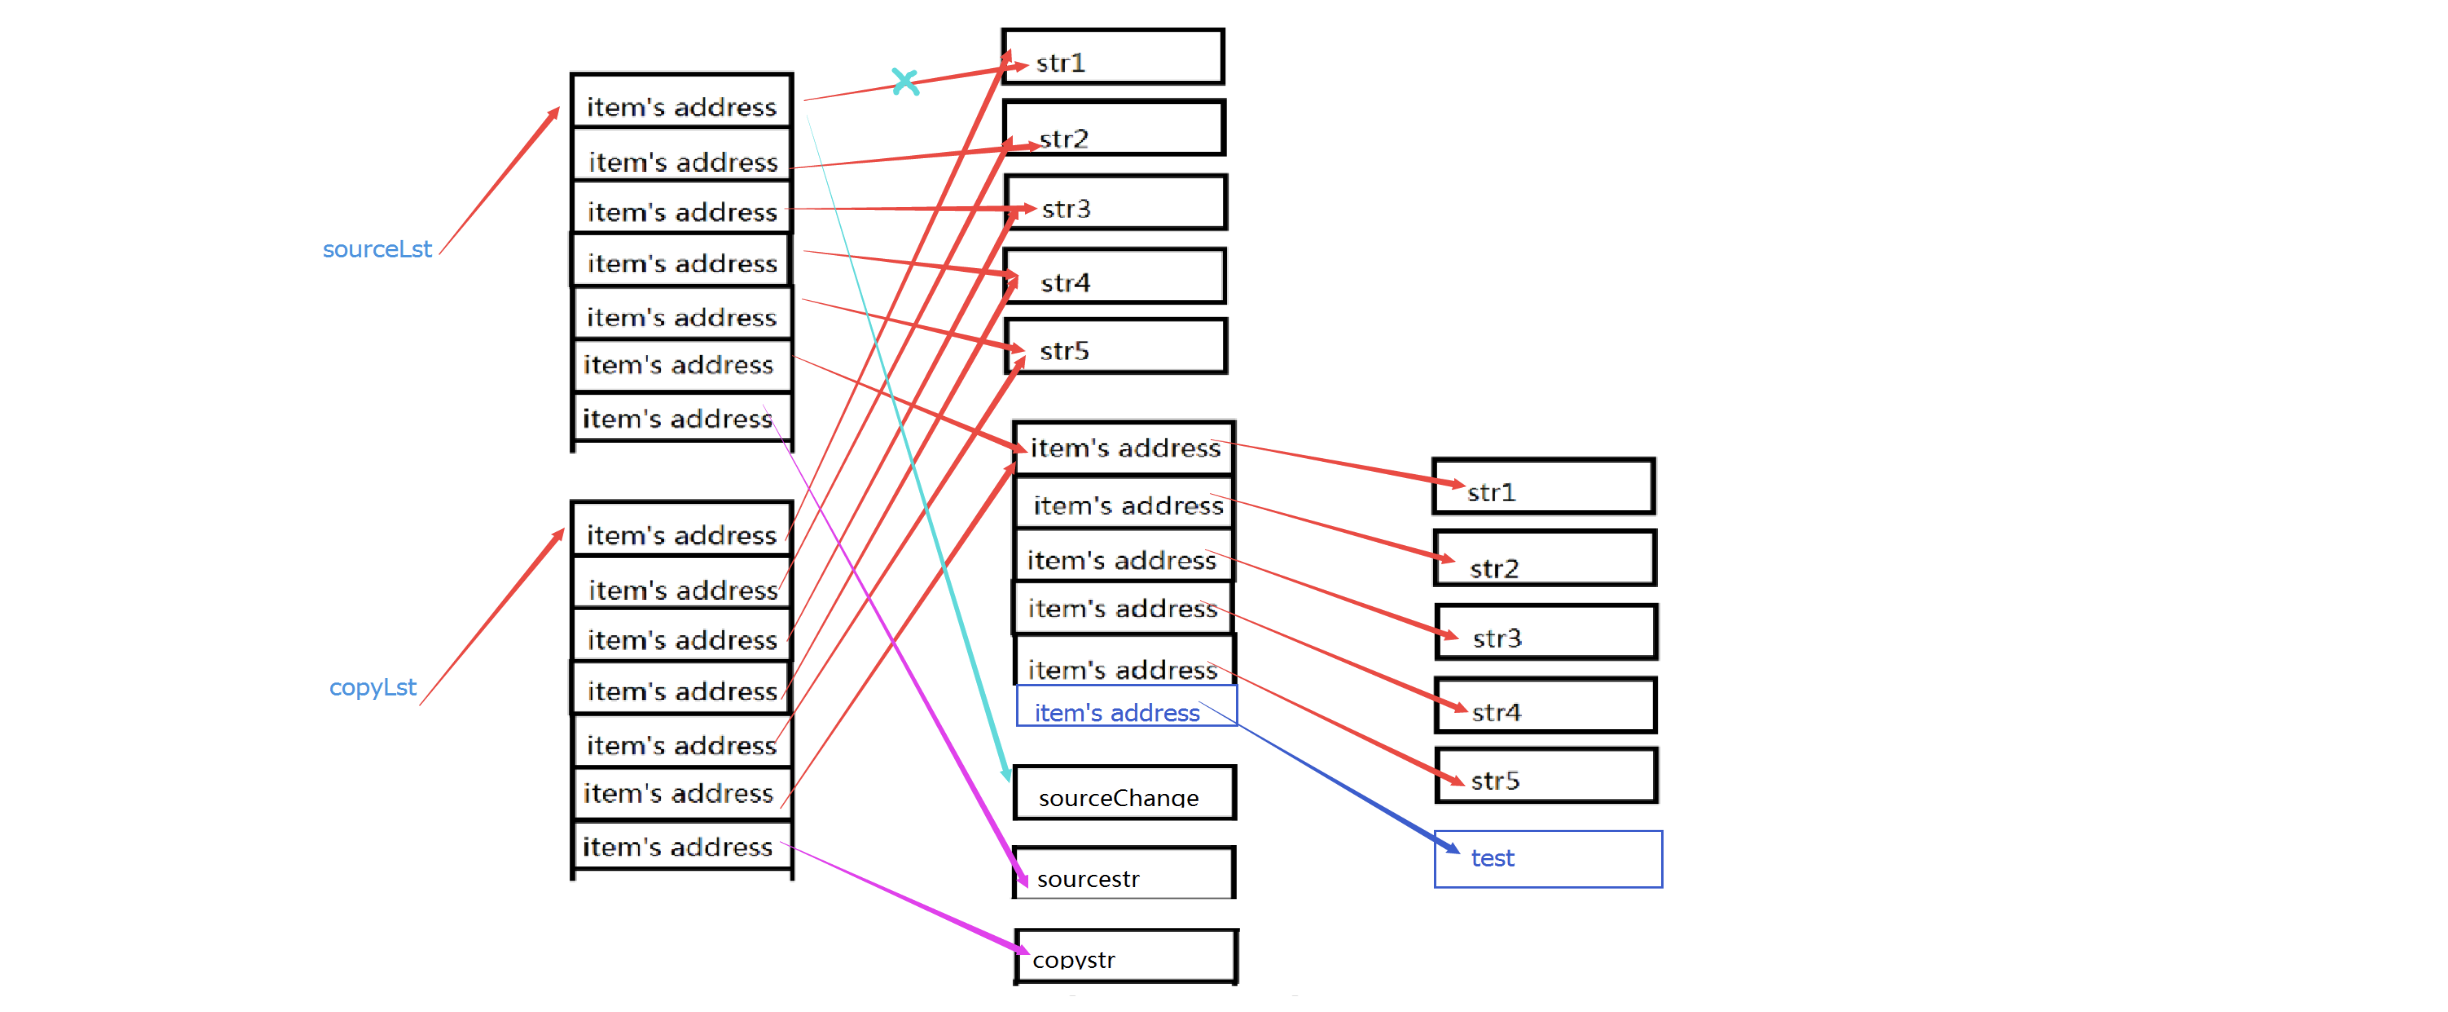

我们可以知道sourceLst和copyLst列表中都存储了一坨地址，当我们修改了sourceLst1的元素时，相当于用'sourceChange'的地址替换了原来'str1'的地址，所以sourceLst的第一个元素发生了变化。而copyLst还是存储了str1的地址，所以copyLst不会发生改变。

当sourceLst列表发生变化，copyLst中存储的lst内存地址没有改变，所以当lst发生改变的时候，sourceLst和copyLst两个列表就都发生了改变。

这种情况发生在字典套字典、列表套字典、字典套列表，列表套列表，以及各种复杂数据结构的嵌套中，所以当我们的数据类型很复杂的时候，用copy去进行浅拷贝就要非常小心。。。

### 深拷贝

刚刚我们了解了浅拷贝的意义，但是在写程序的时候，我们就是希望复杂的数据结构之间完全copy一份并且它们之间又没有一毛钱关系，应该怎么办呢？

我们引入一个深拷贝的概念，深拷贝——即python的copy模块提供的另一个deepcopy方法。深拷贝会完全复制原变量相关的所有数据，在内存中生成一套完全一样的内容，在这个过程中我们对这两个变量中的一个进行任意修改都不会影响其他变量。下面我们就来试验一下。

屏幕快照 2018-08-04 下午5.23.56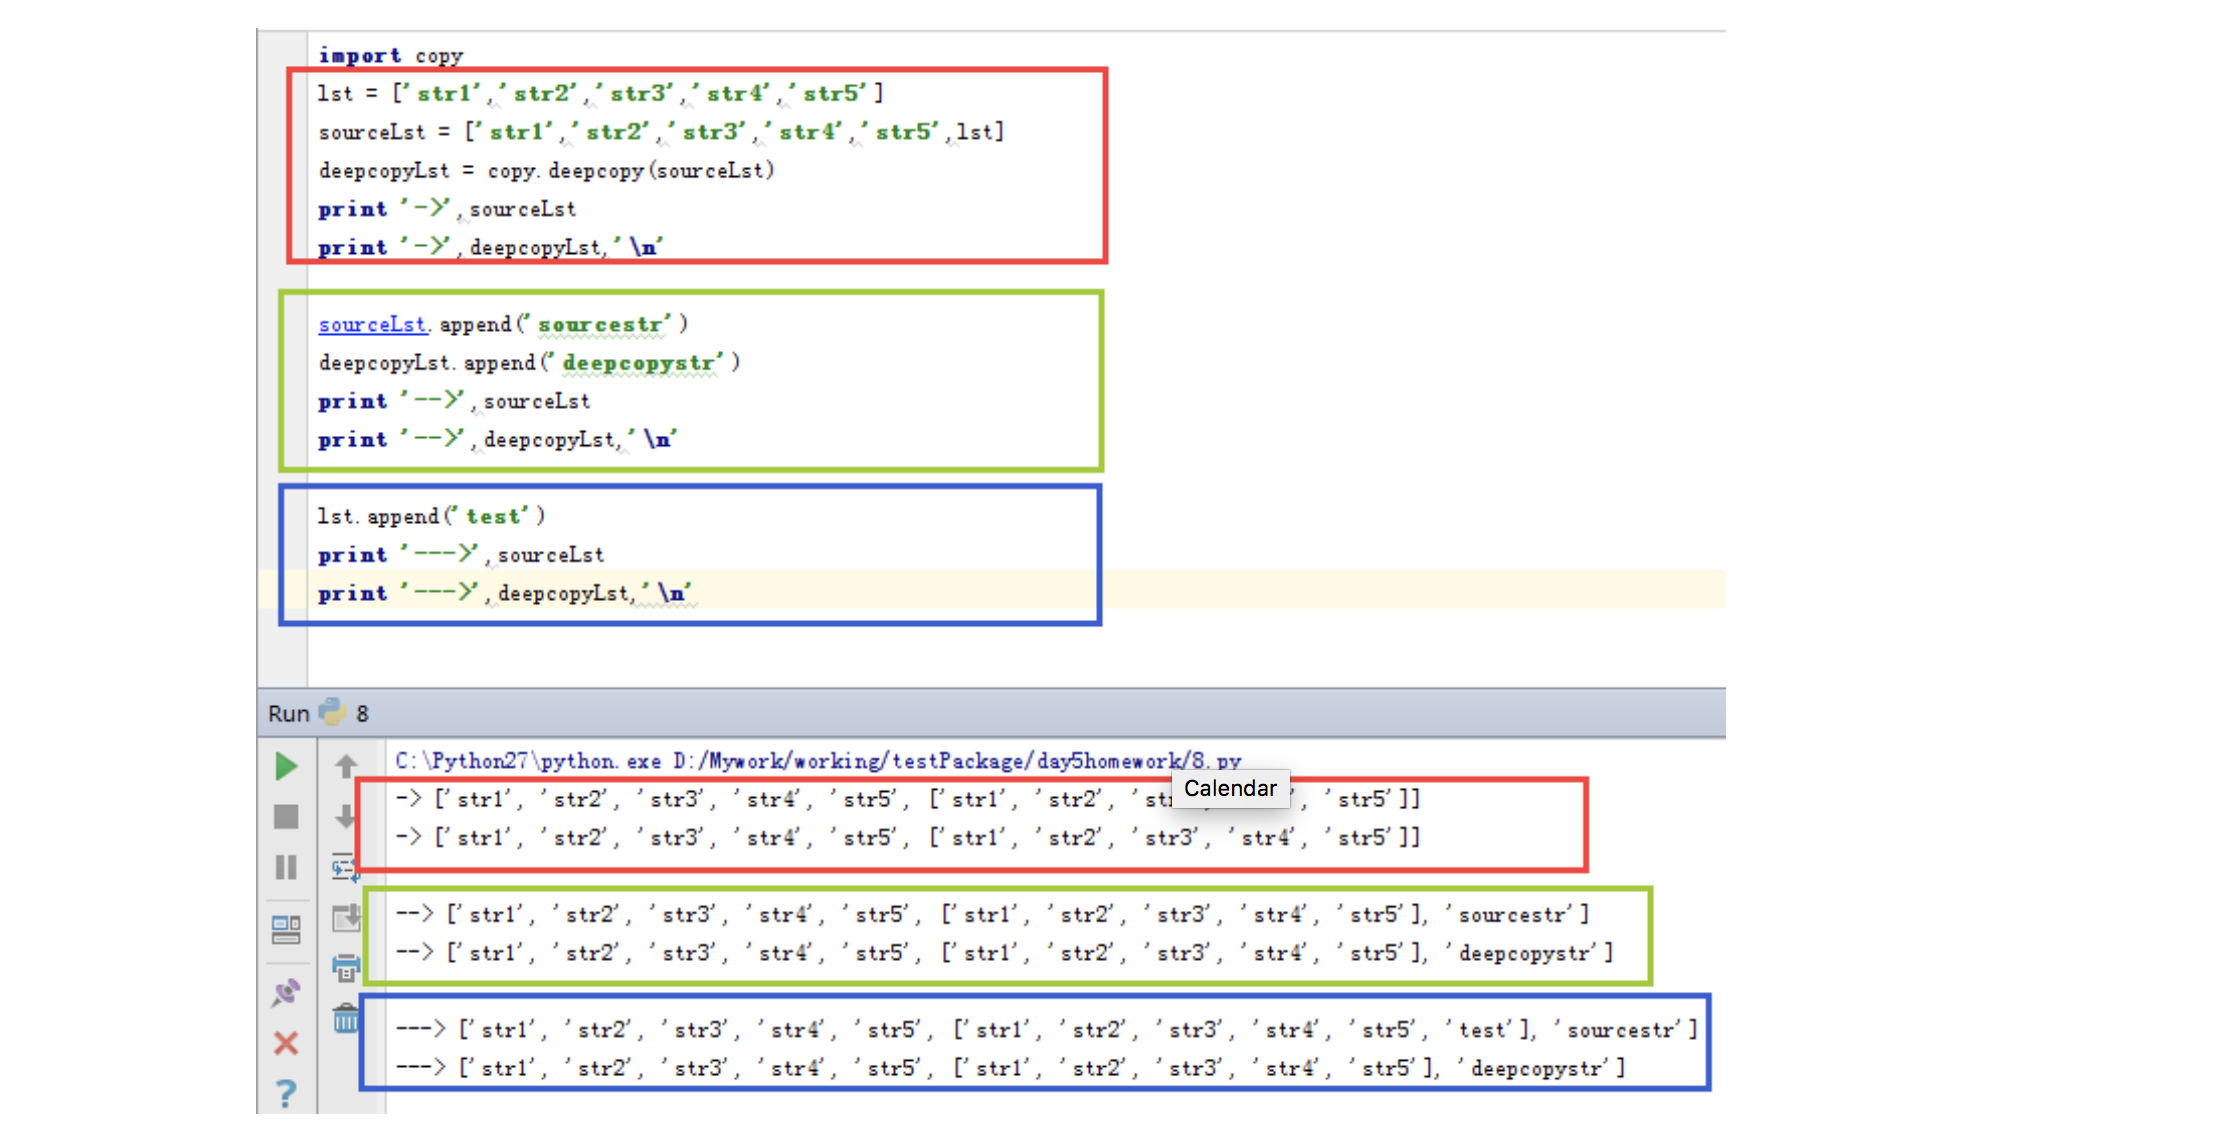

看上面的执行结果，这一次我们不管是对直接对列表进行操作还是对列表内嵌套的其他数据结构操作，都不会产生拷贝的列表受影响的情况。我们再来看看这些变量在内存中的状况：

屏幕快照 2018-08-04 下午5.25.42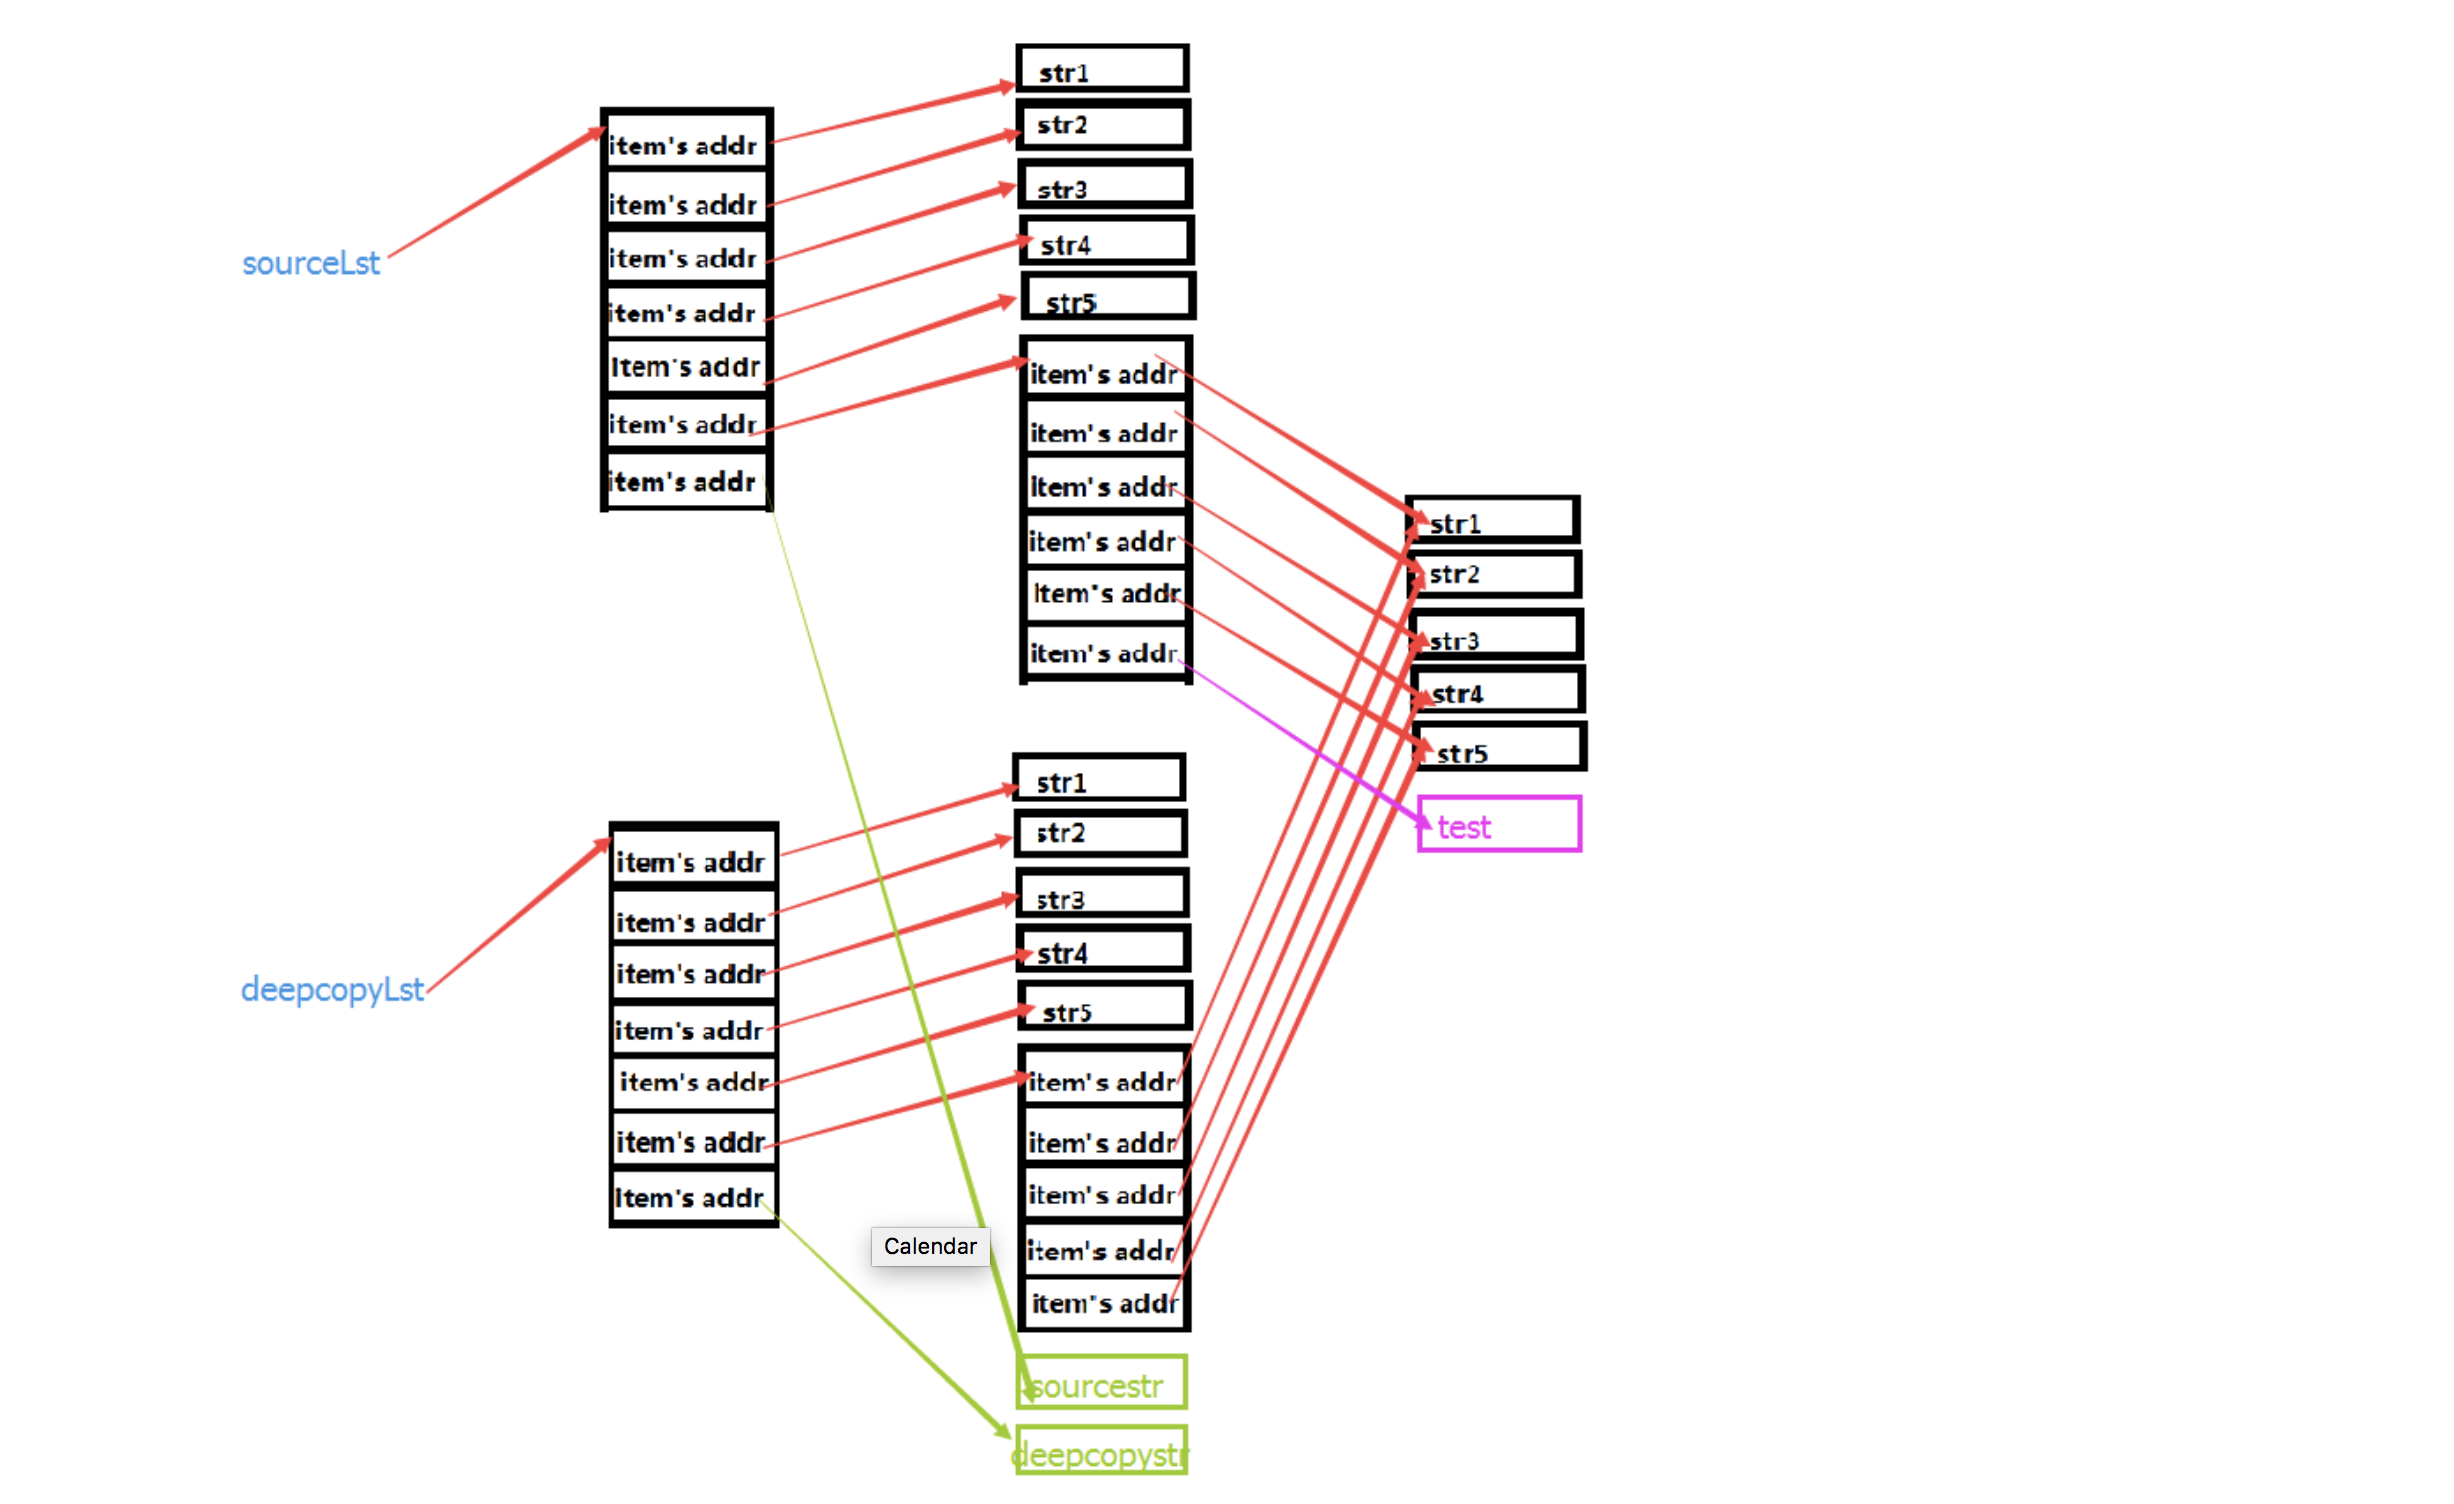

看了上面的内容，我们就知道了深拷贝的原理。其实深拷贝就是在内存中重新开辟一块空间，不管数据结构多么复杂，只要遇到可能发生改变的数据类型，就重新开辟一块内存空间把内容复制下来，直到最后一层，不再有复杂的数据类型，就保持其原引用。这样，不管数据结构多么的复杂，数据之间的修改都不会相互影响。这就是深拷贝~~~